# Star Wars Survey Analysis

This project is focused on answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch? For this project, the focus will be to clean and explor the data set.

The team at [FiveThirtyEight](https://fivethirtyeight.com/) needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their [GitHub repository.](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

The data has several columns, including:

- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response


In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
#  specified encoding because the data set has some characters that aren't in Python's default utf-8 encoding.

Learn more about character encodings on developer [Joel Spolsky's blog](https://www.joelonsoftware.com/2003/10/08/the-absolute-minimum-every-software-developer-absolutely-positively-must-know-about-unicode-and-character-sets-no-excuses/)

In [2]:
print(star_wars.head(10))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [3]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### Removing null values from RespondentID column

**There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in column format. As a result, this data set needs a lot of cleaning.**

First, you'll need to remove the invalid rows. For example, RespondentID is supposed to be a unique ID for each respondent, but it's blank in some rows. You'll need to remove any rows with an invalid RespondentID.


In [4]:
star_wars=star_wars[star_wars['RespondentID'].notnull()]

In [5]:
print(star_wars['RespondentID'].isnull().value_counts())

False    1186
Name: RespondentID, dtype: int64


### Converting columns to boolean type 

- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

Both of the above columns represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question.
Both of the columns are string types, we can convert them to boolean type having values True, False and NaN. Booleans are easier to work with as we can extract rows that are True or Flase without having to do string comparison.


In [6]:
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


In [7]:
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False))

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [8]:
yes_no={"Yes":True, "No":False}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]=star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)

print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


In [9]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]=star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False))

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


### Convert to Boolean and Rename Columns

The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

- Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.
 Let's convert into Boolean and then rename column for easy understanding.
 
 **NOTE:** If the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.


In [10]:
print(star_wars.columns[3:9])

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')


In [11]:
print(star_wars['Unnamed: 4'].value_counts(dropna=False))

NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64


In [12]:
print(star_wars['Unnamed: 5'].value_counts(dropna=False))

NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64


In [13]:
import numpy as np

yes_nan= {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True}

for col in star_wars.columns[3:9]:
    star_wars[col]=star_wars[col].map(yes_nan)

In [14]:
star_wars['Unnamed: 4'].value_counts()

False    615
True     571
Name: Unnamed: 4, dtype: int64

In [15]:
star_wars=star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
                                    'Unnamed: 4':'seen_2', 
                                    'Unnamed: 5':'seen_3', 
                                    'Unnamed: 6':'seen_4', 
                                    'Unnamed: 7':'seen_5', 
                                    'Unnamed: 8':'seen_6'})

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [16]:
print(star_wars['seen_3'].value_counts(dropna=False))

False    636
True     550
Name: seen_3, dtype: int64


### Coverting Columns to Numneric type and Rename

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

- Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
- Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
- Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
- Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
- Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [17]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars=star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
                                    'Unnamed: 10':'ranking_2', 
                                    'Unnamed: 11':'ranking_3', 
                                    'Unnamed: 12':'ranking_4', 
                                    'Unnamed: 13':'ranking_5', 
                                    'Unnamed: 14':'ranking_6'})

star_wars.head()


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Finding highest-ranked movie and ploting a graph

In [18]:
means=star_wars[star_wars.columns[9:15]].mean()
print(means)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


Text(0.5, 1.0, 'Ranking of Star Wars Movies')

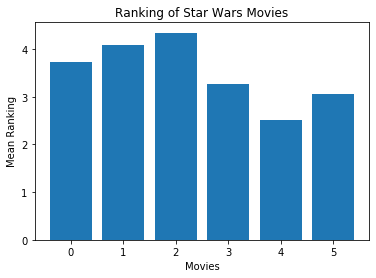

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())

plt.xlabel("Movies")
plt.ylabel("Mean Ranking")
plt.title("Ranking of Star Wars Movies")

**REMARK:**
From the graph, we can conclude that original movies have been ranked high when compared to newer ones. However, we can see that Empire Strike Back is the least ranked movie.

### Finding how many people have seen each movie

We can use the seen columns and call methods like pd.DataFrame.sum() or mean().These methods consider True as 1 and False as 0. This would give how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


Text(0.5, 1.0, 'Number of People Who Saw Star Wars Movies')

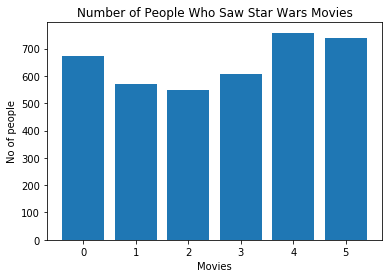

In [20]:
seen_sum=star_wars[star_wars.columns[3:9]].sum()

print(seen_sum)

plt.bar(range(6),seen_sum)

plt.xlabel("Movies")
plt.ylabel("No of people")
plt.title("Number of People Who Saw Star Wars Movies")

**REMARK:**

We can say that over the years Star Wars movies gained popularity as number of people who saw the newer versions are higher than the older versions. Since, number of viewers were high in recent years, the average rankings have been less. 

### Finding statistics over gender
There are several columns that segment our data into two groups. Here are a few examples:

- Do you consider yourself to be a fan of the Star Wars film franchise? - True or False
- Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
- Gender - Male or Female
We can split a dataframe into two groups based on a binary column by creating two subsets of that column. The subsets will allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

In [21]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

#### Ranking Across Male and Female Viewers Graph

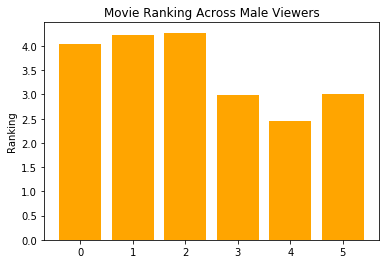

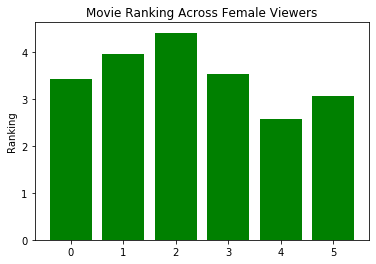

In [22]:

plt.bar(range(6), males[males.columns[9:15]].mean(),color='orange')
plt.ylabel("Ranking")
plt.title("Movie Ranking Across Male Viewers")
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean(),color='green')
plt.ylabel("Ranking")
plt.title("Movie Ranking Across Female Viewers")
plt.show()

**REMARK:**

Movies are ranked almost same across male and female viewers

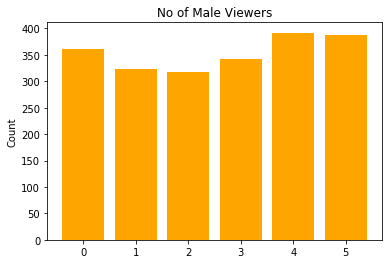

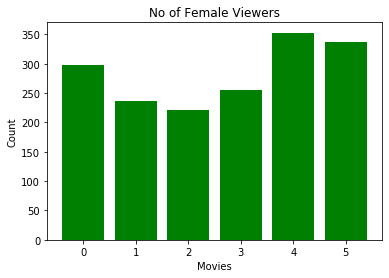

In [23]:
plt.bar(range(6), males[males.columns[3:9]].sum(),color='orange')
plt.ylabel("Count")
plt.title("No of Male Viewers")
plt.show()

plt.bar(range(6), females[females.columns[3:9]].sum(),color='green')
plt.ylabel("Count")
plt.xlabel("Movies")
plt.title("No of Female Viewers")
plt.show()

**REMARK**
Interestingly, more males watches episodes 1-3, but males liked them far more than females did.

### Favorite Characters By Gender

In [24]:
star_wars.columns[15:29]

Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')

### Graph to plot most popular and least popular characters

In [25]:
star_wars['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.'].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64

In [26]:
star_wars.iloc[:,15:29].head()

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


#### Remove the columns with unfamilair value

In [27]:
star_wars=star_wars.rename(columns={'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Han Solo',
       'Unnamed: 16':'Luke Skywalker', 'Unnamed: 17':'Princess Leia Organa', 'Unnamed: 18':'Anakin Skywalker', 'Unnamed: 19':'Obi Wan Kenobi',
       'Unnamed: 20':'Emperor Palpatine', 'Unnamed: 21':'Darth Vader', 'Unnamed: 22':'Lando Calrissian', 'Unnamed: 23':'Boba Fett',
       'Unnamed: 24':'C-3P0', 'Unnamed: 25':'R2 D2', 'Unnamed: 26':'Jar Jar Binks', 'Unnamed: 27':'Padme Amidala',
       'Unnamed: 28':'Yoda'})


In [28]:
star_wars.columns[15:29]

Index(['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'],
      dtype='object')

In [29]:
def fav_unfav(val):
    if val=="Very favorably" or val=="Somewhat favorably":
        return 1
    elif val=="Somewhat unfavorably" or val=="Very unfavorably":
        return -1
    else:
        return 0

    
fav_char=star_wars.iloc[:,15:29].applymap(fav_unfav)

fav_char.head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,1,1,1,1,1,1,1,0,0,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,-1,1,1,1,1,1
5,1,1,1,-1,1,-1,1,0,1,1,1,-1,1,1


In [30]:
net_fav_char_count={}
for col in fav_char.columns:
    net_fav_char_count[col]=fav_char[col].sum()
    
print(net_fav_char_count)
    

{'Han Solo': 752, 'Luke Skywalker': 755, 'Princess Leia Organa': 739, 'Anakin Skywalker': 392, 'Obi Wan Kenobi': 735, 'Emperor Palpatine': 61, 'Darth Vader': 230, 'Lando Calrissian': 294, 'Boba Fett': 150, 'C-3P0': 673, 'R2 D2': 731, 'Jar Jar Binks': -64, 'Padme Amidala': 259, 'Yoda': 733}


In [31]:
net_fav_char_count=pd.Series(net_fav_char_count).sort_values(ascending=False)
print(net_fav_char_count)


Luke Skywalker          755
Han Solo                752
Princess Leia Organa    739
Obi Wan Kenobi          735
Yoda                    733
R2 D2                   731
C-3P0                   673
Anakin Skywalker        392
Lando Calrissian        294
Padme Amidala           259
Darth Vader             230
Boba Fett               150
Emperor Palpatine        61
Jar Jar Binks           -64
dtype: int64


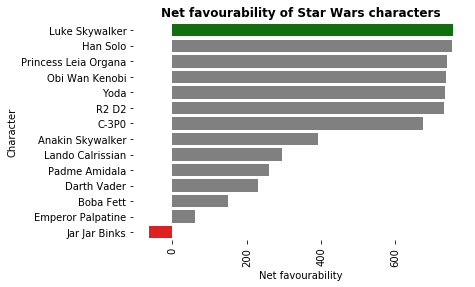

In [32]:
import seaborn as sns

fig, ax = plt.subplots()

colors = ("green" if x == max(net_fav_char_count) else "red" if x == min(net_fav_char_count) else "grey" for x in net_fav_char_count)
ax = sns.barplot(y=net_fav_char_count.index, x=net_fav_char_count, palette = colors, orient="h")
for item in ax.get_xticklabels(): item.set_rotation(90)
ax.set_title('Net favourability of Star Wars characters', fontweight='bold')
ax.set(ylabel='Character', xlabel='Net favourability')
sns.despine(bottom=True, left=True)

**REMARK**
Luke Skywalker is the most popular character with the highest net favorability score. The most popular characters tend to be the ones from the original 3 films, this is unsurprising as these films were both the most viewed and highly ranked.

The least popular character was Jar Jar Binks, who has a lower favourability. 

In [33]:
def like_dislike(val):
    if val > 0:
        return 'like'
    elif val < 0:
        return 'dislike'
    else: 
        return 'neutral'
fav_unfav=fav_char.applymap(like_dislike)

fav_unfav.head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,like,like,like,like,like,like,like,neutral,neutral,like,like,like,like,like
2,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral
3,like,like,like,like,like,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral
4,like,like,like,like,like,like,like,like,dislike,like,like,like,like,like
5,like,like,like,dislike,like,dislike,like,neutral,like,like,like,dislike,like,like


In [34]:
fav_unfav_melt=pd.melt(fav_unfav)
fav_unfav_melt.head()

,variable,value
0,Han Solo,like
1,Han Solo,neutral
2,Han Solo,like
3,Han Solo,like
4,Han Solo,like


In [48]:
dislike=fav_unfav_melt.groupby("variable")["value"].apply(lambda x: x.value_counts()).reset_index()
print(dislike)

                variable  level_1  value
0       Anakin Skywalker  neutral    550
1       Anakin Skywalker     like    514
2       Anakin Skywalker  dislike    122
3              Boba Fett  neutral    754
4              Boba Fett     like    291
5              Boba Fett  dislike    141
6                  C-3P0     like    703
7                  C-3P0  neutral    453
8                  C-3P0  dislike     30
9            Darth Vader     like    481
10           Darth Vader  neutral    454
11           Darth Vader  dislike    251
12     Emperor Palpatine  neutral    741
13     Emperor Palpatine     like    253
14     Emperor Palpatine  dislike    192
15              Han Solo     like    761
16              Han Solo  neutral    416
17              Han Solo  dislike      9
18         Jar Jar Binks  neutral    638
19         Jar Jar Binks  dislike    306
20         Jar Jar Binks     like    242
21      Lando Calrissian  neutral    750
22      Lando Calrissian     like    365
23      Lando Ca

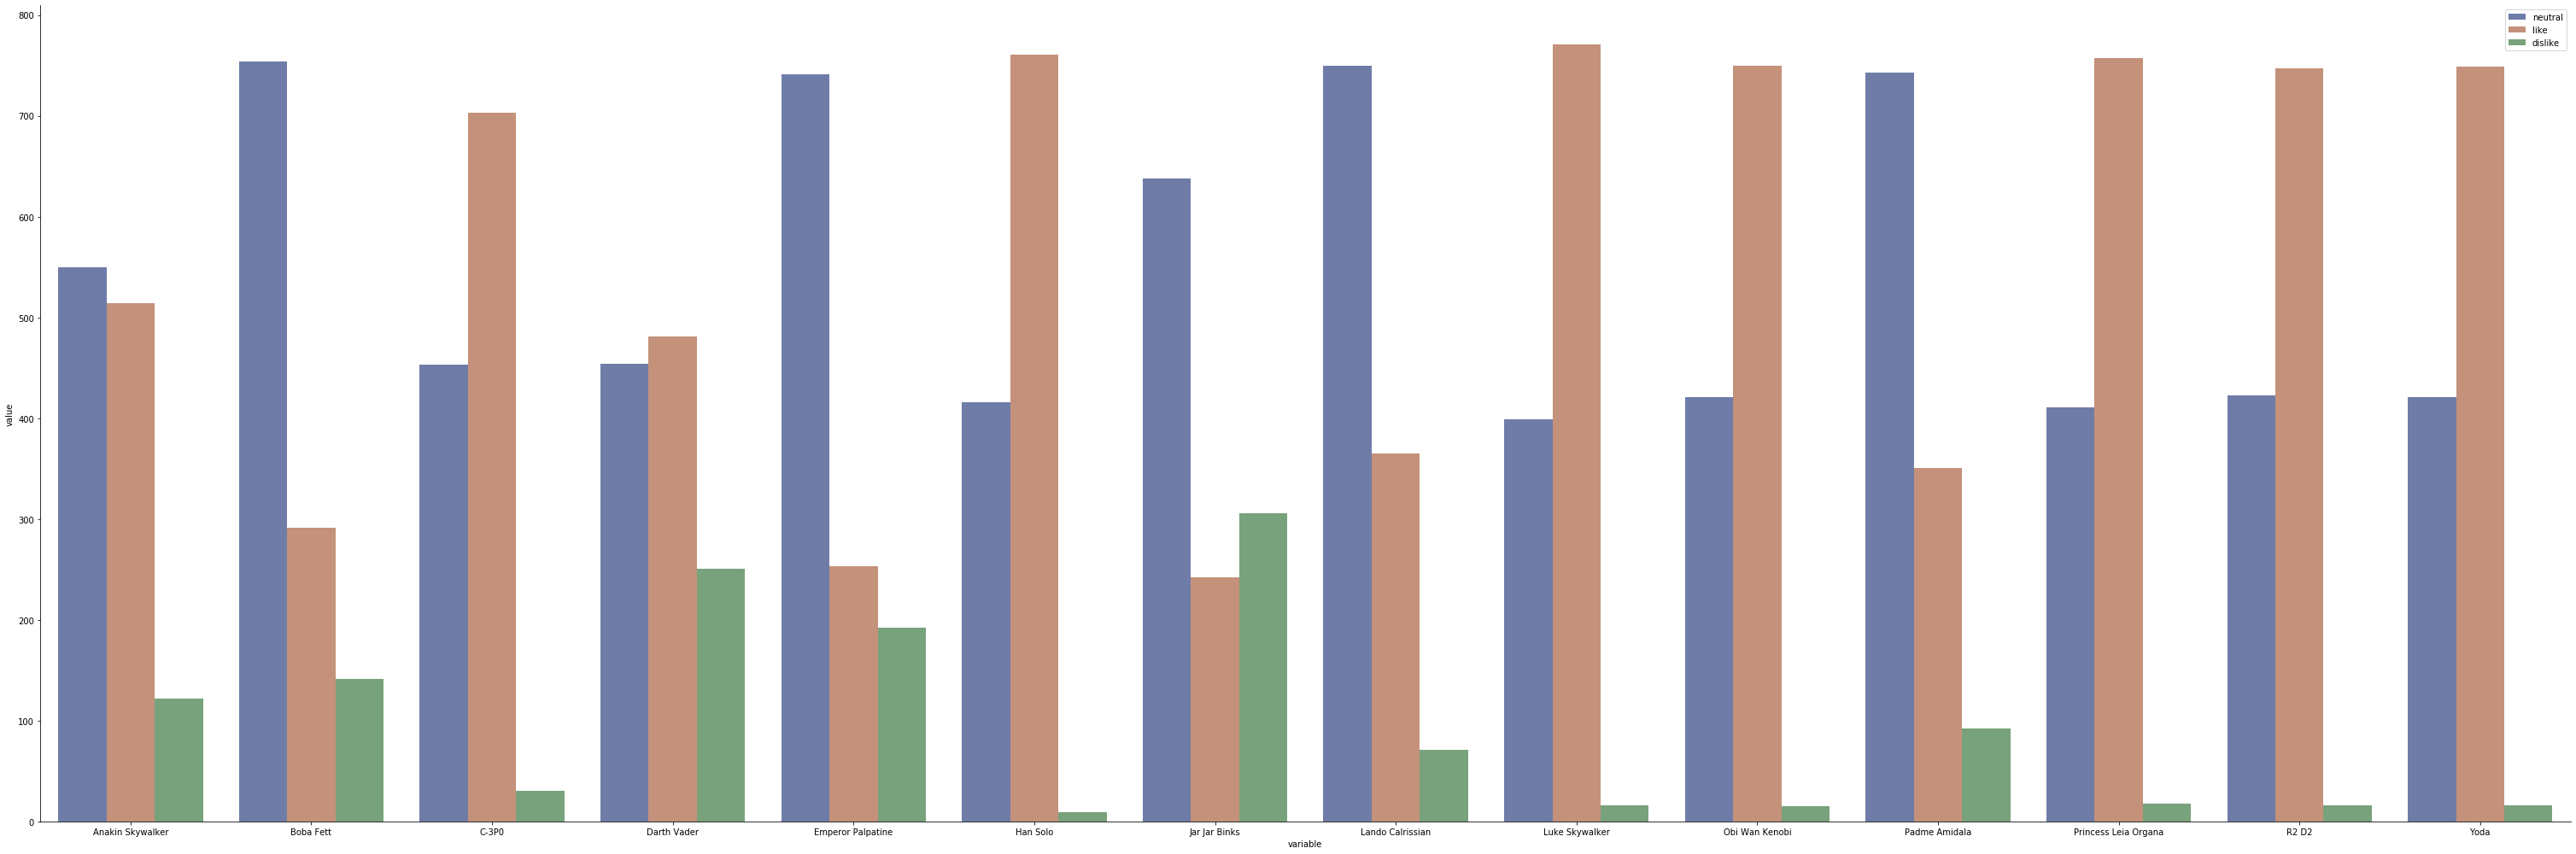

In [50]:
ax = sns.catplot(
    data=dislike, kind="bar",
    x="variable", y="value", hue="level_1",
    ci="sd", palette="dark", alpha=.6, height=14, aspect=3, legend_out=False)

ax.add_legend()

# Conclusion


- Empire Strikes Back is the clear favorite and the most seen while Revenge of the Sith is the least favorite and the least seen
- Some people watch the movies out of order (by release date).
- Luke & Han are the favorites while the controversial Jar Jar Binks is the least favorite
- Males tend to like villains more than females.
- Fans with less than a high school education tend to be more extreme in their ratings and don't like the droids as much as everyone else.
- Fans tend to dislike villains (Anakin, Palpatine, Bobba Fett, Vader) more as their education level increases.


From our analysis, we can conclude that original movies have been ranked high when compared to newer ones. However, we can see that Empire Strike Back is the least ranked movie. Despite the low ranking, most of them saw Empire Strike Back when compared to other movies. 
